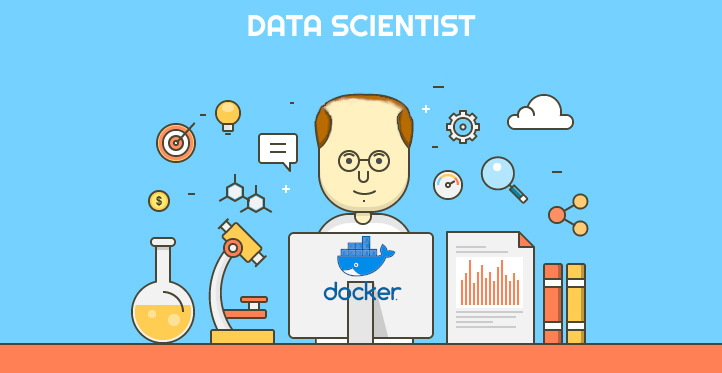

# Modelo "Árvore de Decisão"

Algorítmo Supervisionado destinado a tomada de decisões

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

Antes de mais nada vamos entender como tudo funciona:

In [2]:
lisa = 1
irregular = 0

maca = 1
laranja = 0

pomar = [[150, lisa], [130, lisa], [180, irregular], [160, irregular]]
resultado = [maca, maca, laranja, laranja]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(pomar, resultado)

peso = input("Entre com o peso: ")
superficie = input("Entre com a superficie (1-lisa, 0-irregular): ")

resultadoUsuario = clf.predict([[peso, superficie]])

if resultadoUsuario == 1:
    print("Maça")
else:
    print("Laranja")

Entre com o peso:  12
Entre com a superficie (1-lisa, 0-irregular):  1


Maça


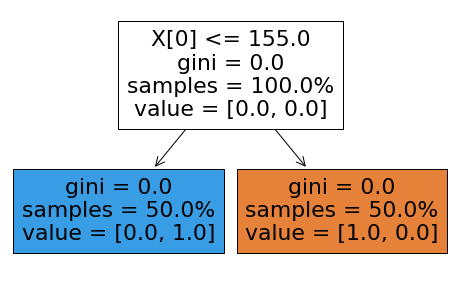

In [7]:
plt.figure(figsize=(8,5))
tree.plot_tree(clf, filled=True, proportion=True, precision=0)
plt.show()

## Dados de Salários de 3 Companhias: Google, Facebook e ABC Pharma

In [2]:
df = pd.read_csv('bases/salaries.csv')
df.head()

,company,job,degree,salary
0,google,sales executive,bachelors,87000
1,google,sales executive,masters,93000
2,google,business manager,bachelors,107000
3,google,business manager,masters,112000
4,google,computer programmer,bachelors,95000


In [3]:
# O que desejo saber? P.ex. Ganhar um salário maior que R$ 100.000 (anual)
desejo = pd.Series(np.where(df['salary']>=100000, 1, 0))
print(desejo)

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
dtype: int64


In [4]:
# Transformar os outros campos para chaves
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

df['company_n'] = le_company.fit_transform(df['company'])
df['job_n'] = le_company.fit_transform(df['job'])
df['degree_n'] = le_company.fit_transform(df['degree'])
df

,company,job,degree,salary,company_n,job_n,degree_n
0,google,sales executive,bachelors,87000,2,2,0
1,google,sales executive,masters,93000,2,2,1
2,google,business manager,bachelors,107000,2,0,0
3,google,business manager,masters,112000,2,0,1
4,google,computer programmer,bachelors,95000,2,1,0
5,google,computer programmer,masters,105000,2,1,1
6,abc pharma,sales executive,masters,92000,0,2,1
7,abc pharma,computer programmer,bachelors,85000,0,1,0
8,abc pharma,business manager,bachelors,95000,0,0,0
9,abc pharma,business manager,masters,103000,0,0,1


In [5]:
# Gerar um novo DataFrame só com os dados necessários
entradas = df.drop(['company','job','degree','salary'], axis='columns')
entradas.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [6]:
# Treinar o modelo
model = tree.DecisionTreeClassifier()
model.fit(entradas, desejo)

DecisionTreeClassifier()

In [7]:
model.score(entradas, desejo)

1.0

In [10]:
# Google | Sales Executive | Masters
model.predict([[0, 1, 1]])

array([1])